# Designing a theme on `altair`

***
Goals:
1. Create a color palette for **the daily chart**. 
2. Customize a theme in `altair`.

***
Ideas:
<br>
<br>

***
TODO: <br>
<input type="checkbox"> Research color palettes<br>
<input type="checkbox"> Explore `altair` predefined themes<br>
<input type="checkbox"> Check out D3 fonts <br>



In [1]:
import altair as alt

In [180]:
def fivethirtyeight_theme():
    markColor = "#282828"
    axisColor = "#282828"
    backgroundColor = "#F7EEF7"
    font = "Helvetica"
    labelfont = "Helvetica"
    return {
        "width": 600,
        "height": 400,
       "config": {
           "arc": {
               "fill": markColor,
           },
           "area": {
               "fill": markColor,
           },
           "axisBand": {
               "grid": False,
           },
           "axisBottom": {
               "domain": False,
               "domainColor": "black",
               "domainWidth": 3,
               "grid": True,
               "gridColor": axisColor,
               "gridWidth": 1,
               "labelFontSize": 12,
               "labelFont": labelfont,
               "labelPadding": 4,
               "tickColor": axisColor,
               "tickSize": 10,
               "titleFontSize": 14,
               "titlePadding": 10,
               "titleFont": font,
           },
           "axisLeft": {
               "domainColor": axisColor,
               "domainWidth": 1,
               "gridColor": axisColor,
               "gridWidth": 1,
               "labelFontSize": 12,
               "labelFont": labelfont,
               "labelPadding": 4,
               "tickColor": axisColor,
               "tickSize": 10,
               "ticks": True,
               "titleFontSize": 14,
               "titlePadding": 10,
               "titleFont": font,
           },
           "axisRight": {
               "domainColor": axisColor,
               "domainWidth": 1,
               "gridColor": axisColor,
               "gridWidth": 1,
               "labelFontSize": 12,
               "labelFont": labelfont,
               "labelPadding": 4,
               "tickColor": axisColor,
               "tickSize": 10,
               "ticks": True,
               "titleFontSize": 14,
               "titlePadding": 10,
               "titleFont": font,
           },
           "axisTop": {
               "domain": False,
               "domainColor": "black",
               "domainWidth": 3,
               "grid": True,
               "gridColor": axisColor,
               "gridWidth": 1,
               "labelFontSize": 12,
               "labelFont": labelfont,
               "labelPadding": 4,
               "tickColor": axisColor,
               "tickSize": 10,
               "titleFontSize": 14,
               "titlePadding": 10,
               "titleFont": font,
           },
           "background": backgroundColor,
           "group": {
               "fill": backgroundColor,
           },
           "legend": {
               "labelFontSize": 11,
               "labelFont": labelfont,
               "padding": 1,
               "symbolSize": 30,
               "symbolType": "square",
               "titleFontSize": 14,
               "titlePadding": 10,
               "titleFont": font,
           },
           "line": {
               "stroke": markColor,
               "strokewidth": 2,
           },
           "path": {
               "stroke": markColor,
               "strokeWidth": 0.5,
           },
           "point": {
               "filled": True,
           },
           "rect": {
               "fill": markColor,
           },
           "range": {
               "category": [
                   "#dc0d7a",
                   "#02a3cd",
                   "#e4a100",
                   "#dc0d12",
                   "#074a7e",
                   "#e46800",
                   "#aa3594",
                   "#a20c4b"
               ],
               "diverging": [
                   "#dc0d12",
                   "#e9686b",
                   "#fbe1e1",
                   "#dff4f9",
                   "#81d1e6",
                   "#03a3cd"
               ],
               "heatmap": [
                   "#fcdfef",
                   "#f8bfde",
                   "#f59fce",
                   "#f180be",
                   "#ee60ad",
                   "#eb409d",
                   "#e7208c",
                   "#e4007c",
               ],
           },
           "symbol": {
               "opacity": 1,
               "shape": "circle",
               "size": 40,
               "strokeWidth": 1,
           },
           "style": {
               "bar": {
                   "binSpacing": 2,
                   "fill": markColor,
                   "stroke": "null",
               },
           },
           "title":{
               "anchor": "start",
               "fontSize": 24,
               "fontWeight": 600,
               "font": font,
               "offset": 20,
           },
           
       },
    }

In [181]:
alt.themes.register("fivethirtyeight", fivethirtyeight_theme)

<function __main__.fivethirtyeight_theme()>

In [182]:
alt.themes.get

<bound method PluginRegistry.get of ThemeRegistry(active='fivethirtyeight', registered=['default', 'fivethirtyeight', 'none', 'opaque'])>

In [183]:
from vega_datasets import data

cars = data.cars.url

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

chart = alt.vconcat(points, bars, data=cars)

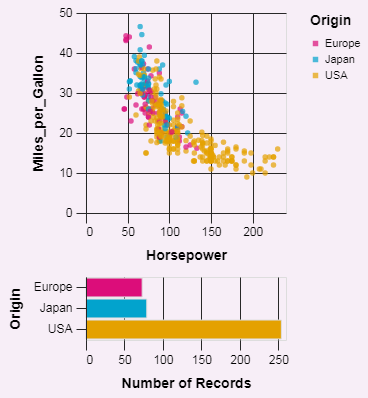

In [184]:
alt.themes.enable('fivethirtyeight')
chart

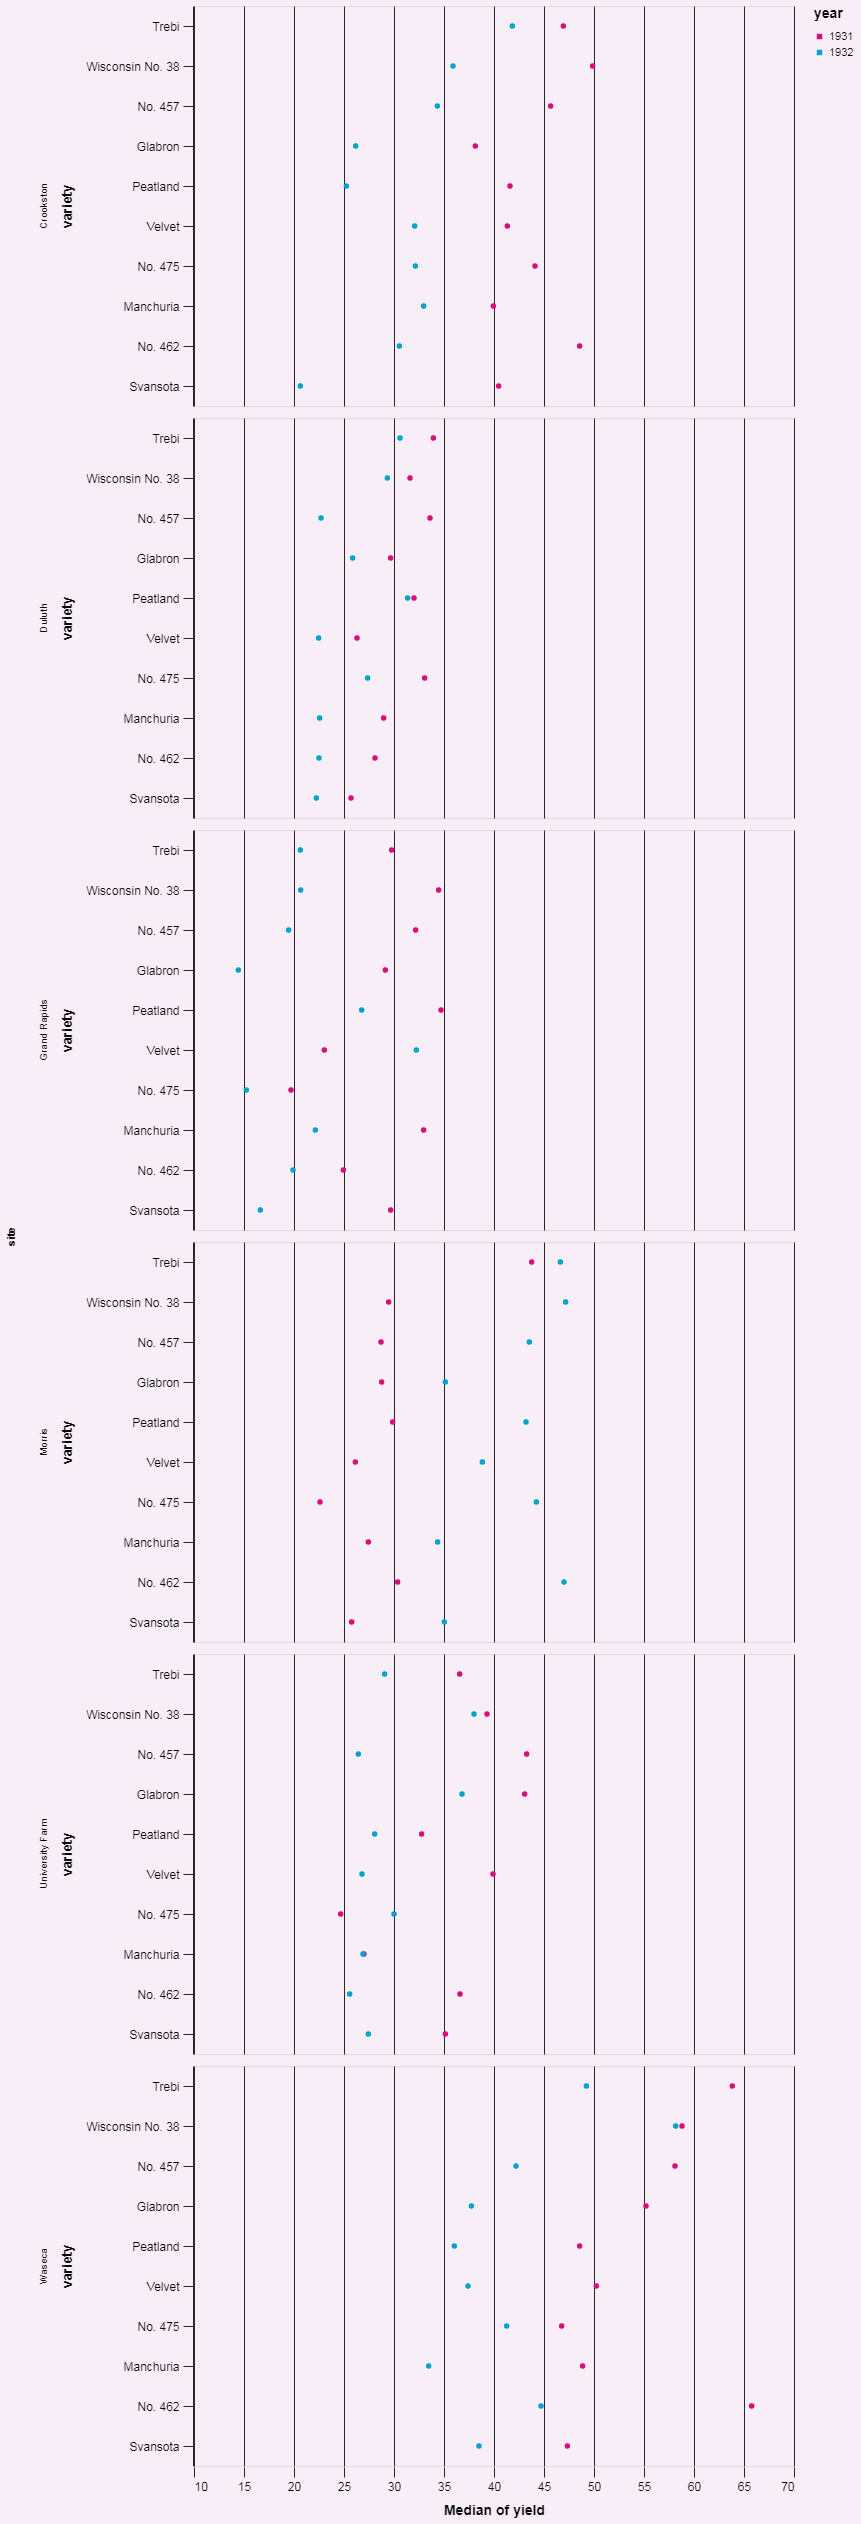

In [185]:
source = data.barley()

alt.Chart(source).mark_point().encode(
    alt.X('median(yield)', scale=alt.Scale(zero=False)),
    alt.Y(
        'variety',
        sort=alt.SortField(field='yield', op='median', order='descending'),
        scale=alt.Scale(rangeStep=20)
    ),
    color='year:N',
    row='site'
)

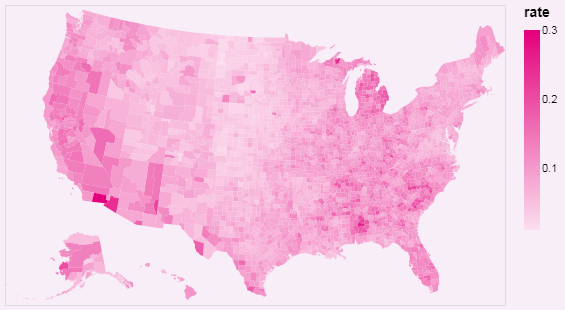

In [186]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
unemp_data = data.unemployment.url


alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

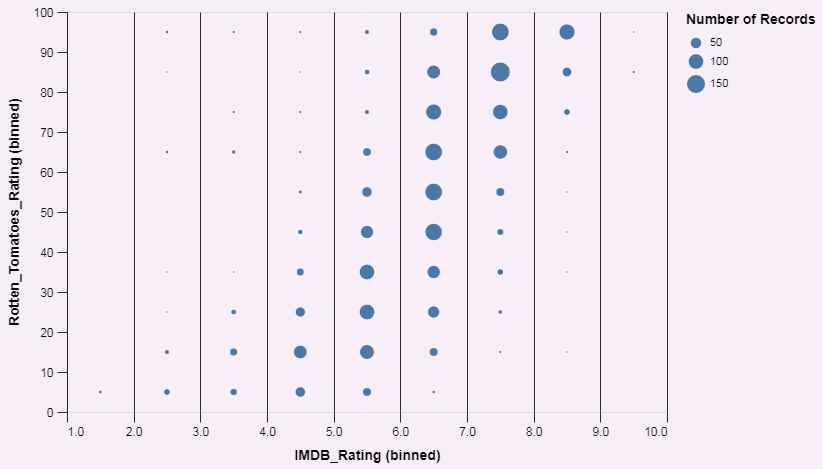

In [187]:
source = data.movies.url

alt.Chart(source).mark_circle().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    size='count()'
)